### Импорт библиотек


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

### Чтение данных


In [ ]:
data = pd.read_csv('dataset.csv')

### Предпросмотр данных и работа с ними


In [ ]:
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
track_id,0
artists,0
album_name,0
track_name,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


В описании к датасету написано, что параметр time signature может варьироваться в диапазоне от 3 до 7, соответствуя 3/4 и 7/4. Но взглянув на данные это не является правдой. Во первых, есть значения 0 и 1, а при этом 6 и 7 отсутствуют.

In [ ]:
data['time_signature'].unique()

array([4, 3, 1, 5, 0])

Послушав сами треки, у которых указано 1 в этой колонке можно быстро понять, что это просто некорректные значения, потому что они не соответсвуют сигнатуре 1/4, если предполагать, что они верные. При этом в самой методике записи сигнатуры уже есть недостатки, потому что она не позволяет прописать корректно, например 8/11. При этом многие песни еще и меняют свою временную сигнатуру в разных частях, что делает этот параметр абсолютно бессмысленным.

In [ ]:
df_filtered = data[data['time_signature'] == 1]
df_filtered

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
117,117,65VhbQdqvozUntjnlFkFbZ,Kina Grannis,You Are My Sunshine,You Are My Sunshine,60,123609,False,0.664,0.0755,...,-19.836,1,0.0389,0.910,0.000000,0.1640,0.57500,80.004,1,acoustic
186,186,4bXoVtbp6fN8FaSQvGQB41,Chord Overstreet,Tree House Tapes,Tortured Soul,53,246613,False,0.550,0.4990,...,-9.502,1,0.0338,0.472,0.000002,0.0798,0.14400,86.966,1,acoustic
248,248,6OCsvPU6P84wJ0erggCRv4,Albert King,pov: you have a holly jolly christmas,Christmas Comes But Once A Year,0,272640,False,0.687,0.4940,...,-9.421,1,0.0505,0.324,0.000055,0.0867,0.62100,93.269,1,acoustic
249,249,7qJtNgmUyzy3R86vJwk9Wp,Albert King,pov: you rock around the christmas tree,Christmas Comes But Once A Year,0,272640,False,0.687,0.4940,...,-9.421,1,0.0505,0.324,0.000055,0.0867,0.62100,93.269,1,acoustic
286,286,2Dz5WpEWA0vhnMmEPYiZ2y,Parachute,Losing Sleep,She Is Love,60,146066,False,0.629,0.1740,...,-9.697,1,0.1410,0.616,0.000000,0.1180,0.30500,134.295,1,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113593,113593,6H1U6y9b0htZoSCfROkKgh,Ruido Blanco Hart,Juegos para el Cerebro - La Mejor Música Relaj...,Mejora la Memoria,25,403999,False,0.208,0.1510,...,-17.049,1,0.0493,0.994,0.967000,0.0933,0.07090,115.146,1,world-music
113686,113686,0VI2Pe8VIcAQoGg42Zs2vA,Reiki Armonía,Sonidos de Fondo para Reiki: Gotas de Agua,"Para Reiki: Gotas de Agua, Pt. 24",25,109506,False,0.139,0.9250,...,-32.267,0,0.0474,0.131,0.992000,0.8950,0.00271,85.949,1,world-music
113791,113791,03KJvToiQ5xkTvgii0iVuJ,Lucas Cervetti,Frecuencias Álmicas en 432hz,"Frecuencia Álmica, Pt. 1",23,421000,False,0.196,0.1260,...,-15.217,1,0.0306,0.976,0.905000,0.0639,0.07960,99.783,1,world-music
113819,113819,0MGaMJckimN7NUtJNofC02,Agua Mantra,"Salida del Sol: Poder del Cerebro, Musica para...",Eternidad,22,370999,False,0.165,0.1460,...,-23.202,1,0.0426,0.972,0.264000,0.2290,0.05520,93.777,1,world-music


In [ ]:
data = data.drop('time_signature', axis=1)

Дальше из кода удаляются дубликаты треков, сохраняется трек с самым высоким значением популярности

In [ ]:
idx = data.groupby(['track_name', 'artists'])['popularity'].idxmax()
data = data.loc[idx].reset_index(drop=True)

In [ ]:
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,36750,0fROT4kK5oTm8xO8PX6EJF,Rilès,!I'll Be Back!,!I'll Be Back!,52,178533,True,0.823,0.6120,1,-7.767,1,0.2480,0.168,0.000000,0.1090,0.6880,142.959,french
1,92751,1hH0t381PIXmUVWyG1Vj3p,Brian Hyland,The Bashful Blond,"""A"" You're Adorable",39,151680,False,0.615,0.3750,0,-10.362,0,0.0319,0.482,0.000000,0.1110,0.9220,110.720,rockabilly
2,66970,1B45DvGMoFWdbAEUH2qliG,Little Apple Band,The Favorite Songs Of Sesame Street,"""C"" IS FOR COOKIE",32,84305,False,0.553,0.8120,3,-5.542,1,0.0558,0.132,0.000010,0.0794,0.8710,118.368,kids
3,66996,73lXf5if6MWVWnsgXhK8bd,Little Apple Band,Sesame Street and Friends,"""C"" is for Cookie",8,86675,False,0.664,0.6110,3,-8.687,1,0.0886,0.120,0.000000,0.0408,0.7580,118.443,kids
4,101161,0jmz4aHEIBCRgrcV2xEkwB,Traditional;Sistine Chapel Choir;Massimo Palom...,Classical Christmas,"""Christe, Redemptor omnium""",0,289133,False,0.111,0.0568,10,-28.053,1,0.0551,0.990,0.697000,0.1100,0.0395,169.401,sleep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81338,65756,2oVHb8wyg6oC2iNpGBNvx1,HEIZE,Hotel del Luna (Original Television Soundtrack...,내 맘을 볼 수 있나요,63,225785,False,0.397,0.1660,9,-10.678,1,0.0349,0.884,0.000000,0.1000,0.1310,134.708,k-pop
81339,65859,4kIpBfvK44bxqX7zo8K1oP,Gaho,ITAEWON CLASS (Original Television Soundtrack)...,시작,65,202440,False,0.591,0.8180,4,-3.532,1,0.0730,0.172,0.000000,0.1260,0.5740,108.107,k-pop
81340,75903,4mHc7LUlO3k6AXeFV2EiJK,Yiruma,Yiruma Official Album 'Piano Therapy' (The Ori...,약속 (Piano Solo),37,144533,False,0.504,0.1430,1,-18.713,1,0.0701,0.980,0.922000,0.1240,0.0584,148.786,new-age
81341,79554,0tQesiSZJQOdHeAC7r59us,GODA,One Punch Man (Original Soundtrack),원펀맨 Theme - Sad Theme,37,228000,False,0.542,0.3370,2,-16.088,1,0.0539,0.985,0.933000,0.1470,0.4430,159.951,piano


Дальше удаляются колонки, не имеющие отношения к анализу и предсказанию значения популярности

In [ ]:
data = data.drop('track_id', axis=1)
data = data.drop('artists', axis=1)
data = data.drop('album_name', axis=1)
data = data.drop('track_name', axis=1)
data = data.drop('Unnamed: 0', axis=1)

Кодирование категориальных параметров

In [ ]:
data['explicit'] = data['explicit'].astype(int)
unique_genre = data['track_genre'].unique()
genre_map = {}
for i in range(len(unique_genre)):
  genre_map[unique_genre[i]] = i
data['track_genre'] = data['track_genre'].map(genre_map)

Для удобства обработки переводим значение длины трека из милисекунд в секунды

In [ ]:
data['duration_s'] = (data['duration_ms'] / 1000).round()
data = data.drop(columns=['duration_ms'])

----

### Разведочный анализ данных (EDA)


График корреляции. По нему можно заметить интересные свойства. Например высокую позитивную корреляцию (energy-loudness) и (danceability-valence), а также высокую отрицательную корреляцию между (energy-acousticness), (loudness-acousticness), (instrumentalness-loudness).

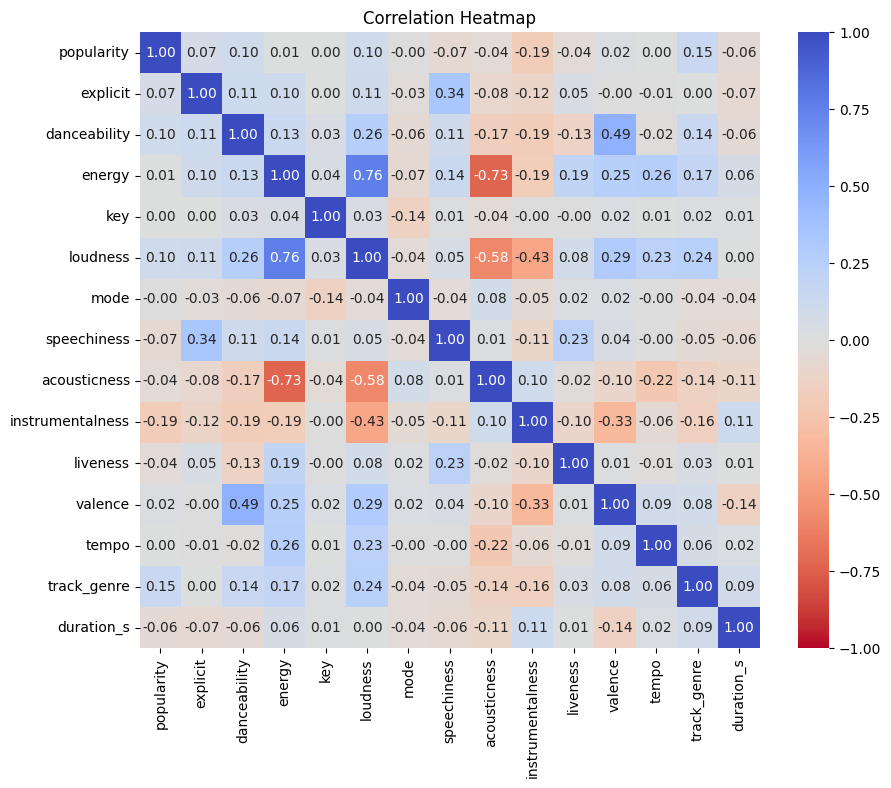

In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm_r",
    vmin=-1, vmax=1
)
plt.title("Correlation Heatmap")
plt.show()

Таким образом можно убрать параметр energy из-за его близости с loudness. Также следует убрать параметр valence из-за его близкой корреляции с danceability, energy, loudness и instrumentalness. Целевой параметр popularity значительно коррелирует с danceability, loudness, instrumentalness и track_genre

In [ ]:
data = data.drop('energy', axis=1)
data = data.drop('valence', axis=1)

В описании датасета написано, что треки с параметром speechiness >= 0.66 вероятнее всего являются полностью речью. Такие данные могут помешать нам точно предсказывать параметр, потому что направленность датасета на музыку.

In [ ]:
count_speech_tracks = (data['speechiness'] >= 0.66).sum()
print(count_speech_tracks)
data = data[data['speechiness'] < 0.66]

862


В описании датасета говорится о том, что значение -1 является неопределенным. Нужно посмотреть, сколько таких значения относительно остальных и понять, стоит ли использовать этот параметр.

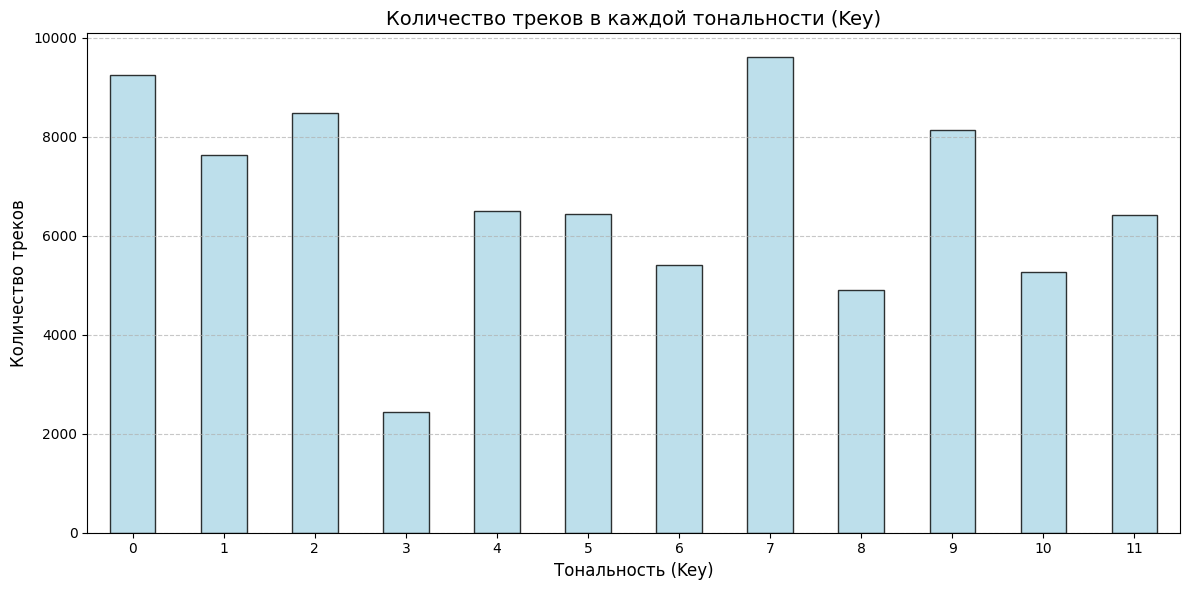

In [ ]:
key_counts = data['key'].value_counts()

plt.figure(figsize=(12, 6))
key_counts.sort_index().plot(kind='bar', color='lightblue', edgecolor='black', alpha=0.8)
plt.title('Количество треков в каждой тональности (Key)', fontsize=14)
plt.xlabel('Тональность (Key)', fontsize=12)
plt.ylabel('Количество треков', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Значений -1 не было обнаружено, поэтому параметр стоит оставить.

График частотности популярностей трека

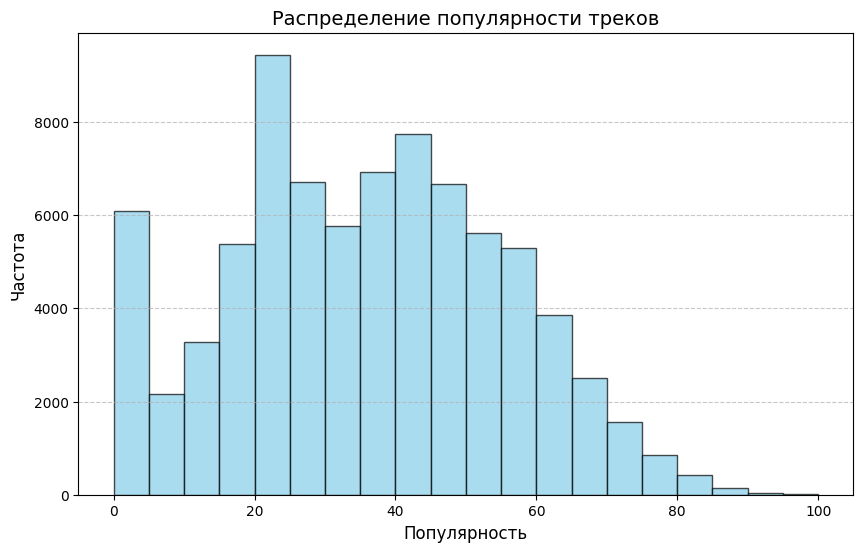

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data['popularity'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Распределение популярности треков', fontsize=14)
plt.xlabel('Популярность', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

получаем большие выбросы в районе 0-5 и 20-25, а также видим очень низкое кол-во треков с популярностью 80+.

Можно заметить сильную корреляцию между различными жанрами и степенью их популярности

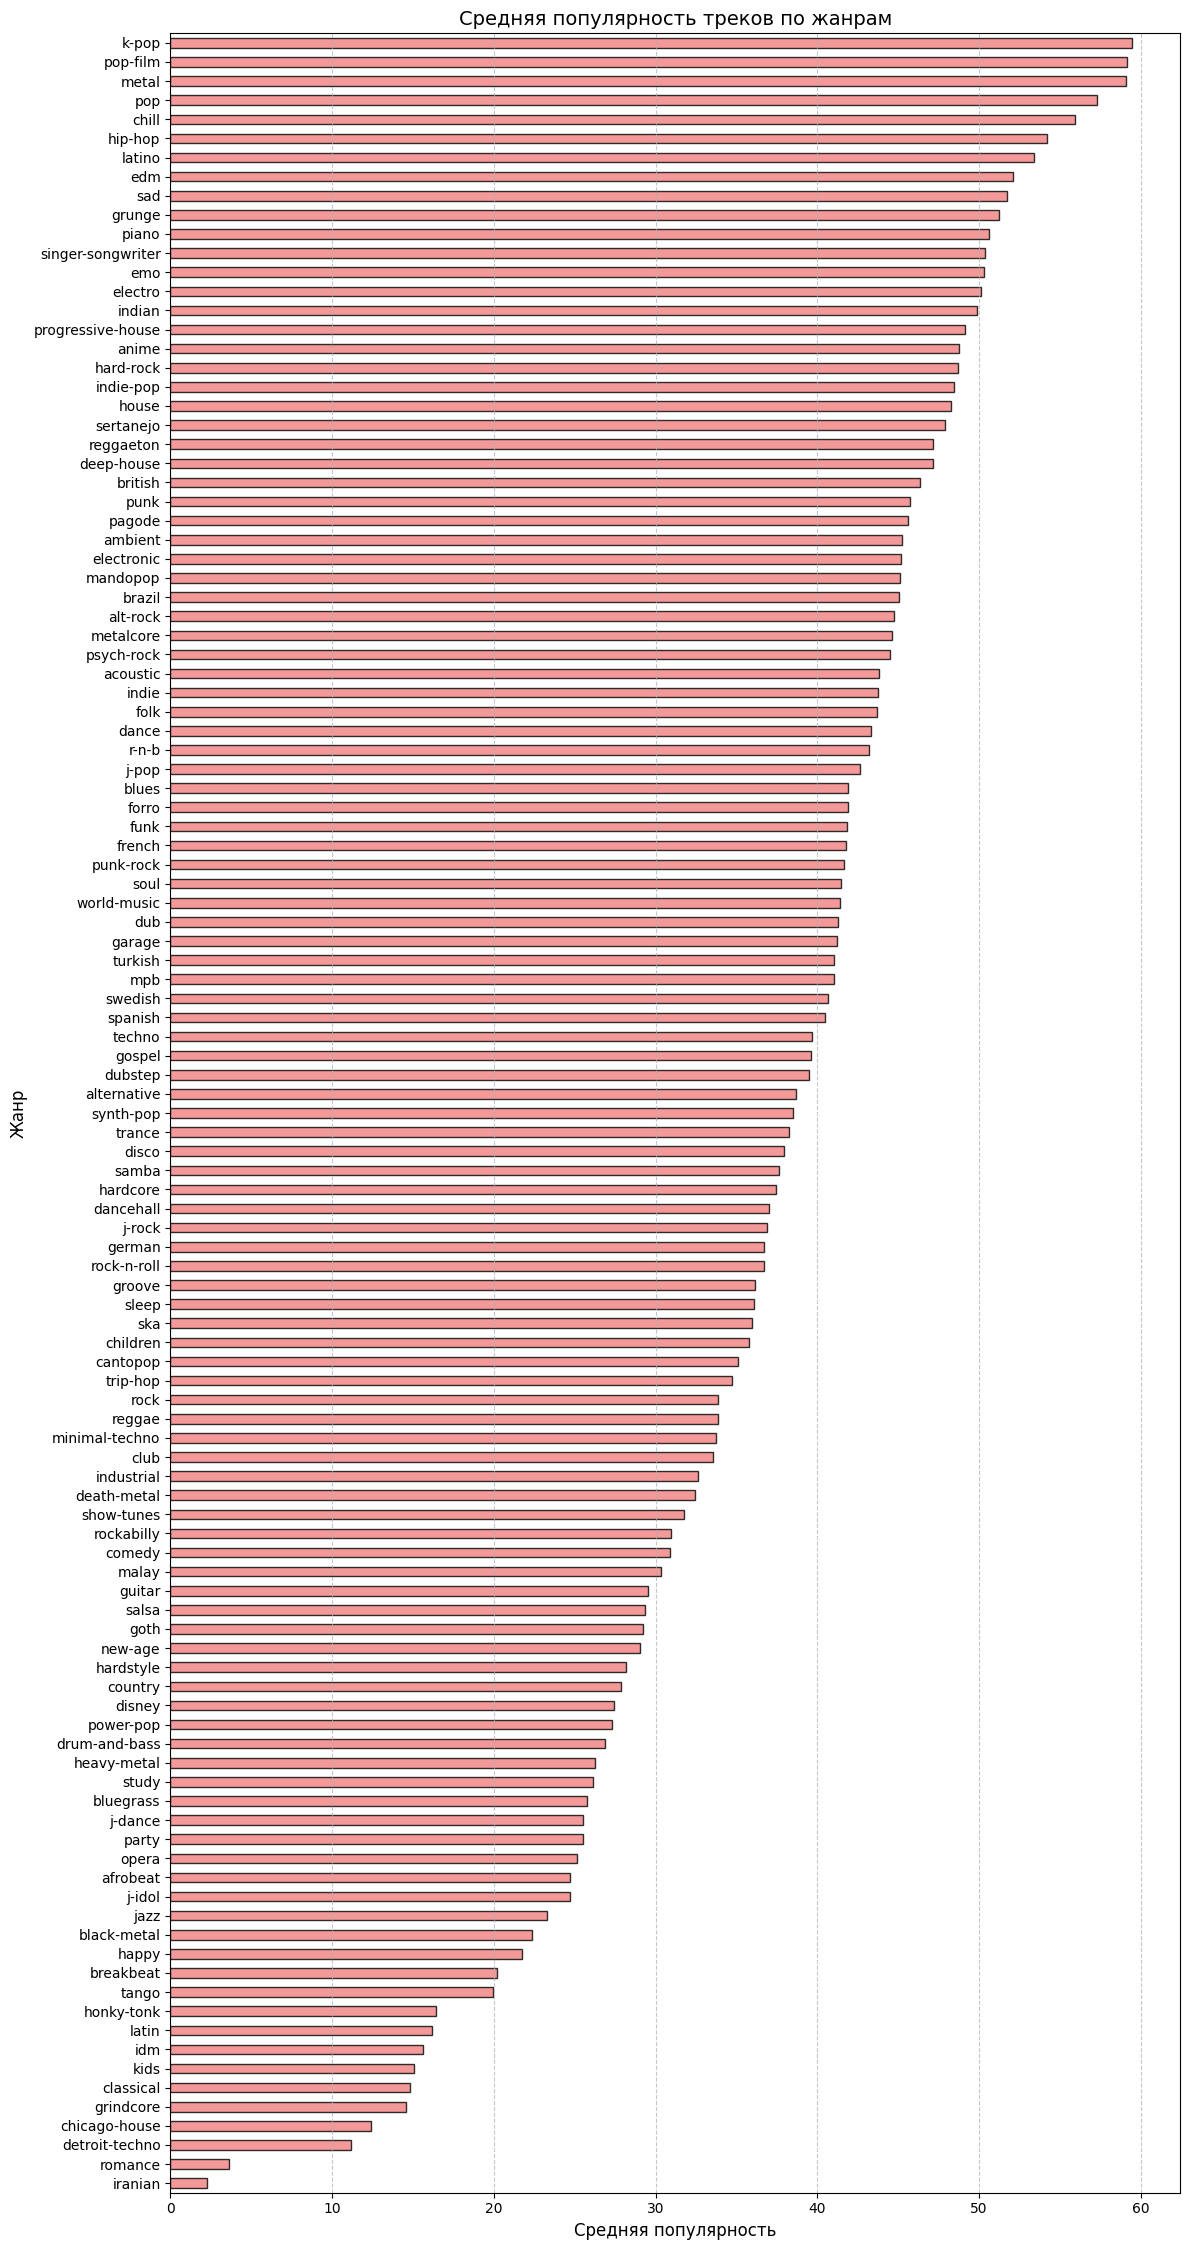

In [ ]:
genre_map_numeric_to_string = {v: k for k, v in genre_map.items()}

avg_popularity_by_genre = data.groupby('track_genre')['popularity'].mean().sort_values(ascending=True)
avg_popularity_by_genre.index = avg_popularity_by_genre.index.map(genre_map_numeric_to_string)

plt.figure(figsize=(12, len(avg_popularity_by_genre) * 0.2))
avg_popularity_by_genre.plot(kind='barh', color='lightcoral', edgecolor='black', alpha=0.8)
plt.title('Средняя популярность треков по жанрам', fontsize=14)
plt.xlabel('Средняя популярность', fontsize=12)
plt.ylabel('Жанр', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

В особенности выделелись k-pop, pop-film и metall. А iranian, detroit-techno и romance показали низкую популярность.

Проверим степень дисбаланстности класса explicit

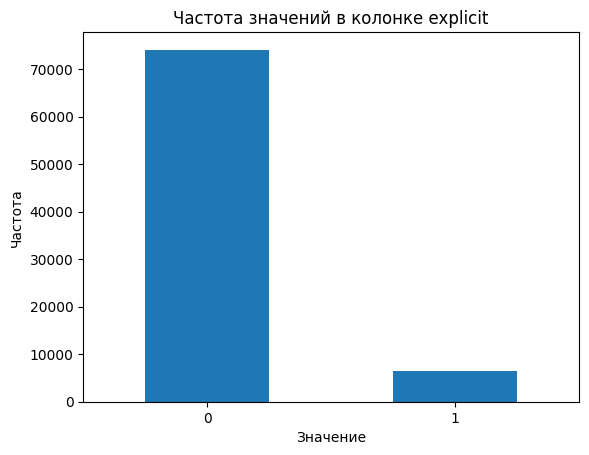

In [ ]:
data['explicit'].value_counts().plot(kind='bar')

plt.title('Частота значений в колонке explicit')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.xticks(rotation=0)
plt.show()

Класс обладает высокой степенью дисбалансности

In [ ]:
data

,popularity,explicit,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,track_genre,duration_s
0,52,1,0.823,1,-7.767,1,0.2480,0.168,0.000000,0.1090,142.959,0,179.0
1,39,0,0.615,0,-10.362,0,0.0319,0.482,0.000000,0.1110,110.720,1,152.0
2,32,0,0.553,3,-5.542,1,0.0558,0.132,0.000010,0.0794,118.368,2,84.0
3,8,0,0.664,3,-8.687,1,0.0886,0.120,0.000000,0.0408,118.443,2,87.0
4,0,0,0.111,10,-28.053,1,0.0551,0.990,0.697000,0.1100,169.401,3,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81338,63,0,0.397,9,-10.678,1,0.0349,0.884,0.000000,0.1000,134.708,63,226.0
81339,65,0,0.591,4,-3.532,1,0.0730,0.172,0.000000,0.1260,108.107,63,202.0
81340,37,0,0.504,1,-18.713,1,0.0701,0.980,0.922000,0.1240,148.786,40,145.0
81341,37,0,0.542,2,-16.088,1,0.0539,0.985,0.933000,0.1470,159.951,7,228.0


### Feature Engineering


Создадим новые фичи с помощью уже имеющихся

In [ ]:
data_temp = data.copy()

# Нормализуем каждый множитель
data_temp['normalized_danceability'] = (data_temp['danceability'] - data_temp['danceability'].min()) / (data_temp['danceability'].max() - data_temp['danceability'].min())
data_temp['normalized_tempo'] = (data_temp['tempo'] - data_temp['tempo'].min()) / (data_temp['tempo'].max() - data_temp['tempo'].min())
data_temp['normalized_loudness'] = (data_temp['loudness'] - data_temp['loudness'].min()) / (data_temp['loudness'].max() - data_temp['loudness'].min())

data['raveness'] = data_temp['normalized_danceability'] * (data_temp['normalized_tempo']) * (data_temp['normalized_loudness'])


Эта фича отображает, насколько трек подходит для рейвов, так как популярность в подобных местах будет обозначать широкое распостранение, а в следствии узнаваемость

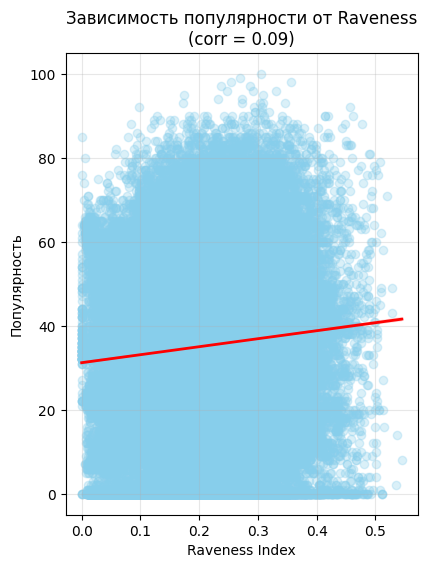

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.regplot(x='raveness', y='popularity', data=data,
           scatter_kws={'alpha':0.3, 'color':'skyblue'},
           line_kws={'color':'red', 'lw':2})
plt.title(f'Зависимость популярности от Raveness\n(corr = {data["raveness"].corr(data["popularity"]):.2f})', fontsize=12)
plt.xlabel('Raveness Index', fontsize=10)
plt.ylabel('Популярность', fontsize=10)
plt.grid(alpha=0.3)

Признак показал неплохую положительную корреляцию с популярностью, хотя и заметно меньшую, чем genre или instrumentalness.

Акустичность и инструментальность трека вместе будут давать более точную характеристику того, насколько много в треке живых инструментов.

In [ ]:
data['instrumental_proportion'] = data['instrumentalness'] * data['acousticness']


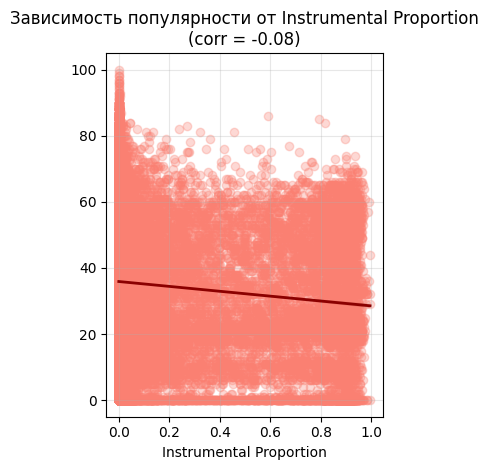

In [ ]:
plt.subplot(1, 2, 2)
sns.regplot(x='instrumental_proportion', y='popularity', data=data,
           scatter_kws={'alpha':0.3, 'color':'salmon'},
           line_kws={'color':'darkred', 'lw':2})
plt.title(f'Зависимость популярности от Instrumental Proportion\n(corr = {data["instrumental_proportion"].corr(data["popularity"]):.2f})', fontsize=12)
plt.xlabel('Instrumental Proportion', fontsize=10)
plt.ylabel('')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

Фича демонстрирует небольшую негативную корреляцию. В контексте нашего датасета такая метрика кореляции является достаточно хорошей, хотя и не лучшей.

# Feature Importances

Создаем простую модель используя RandomForest и определяем важность признаков для модели.

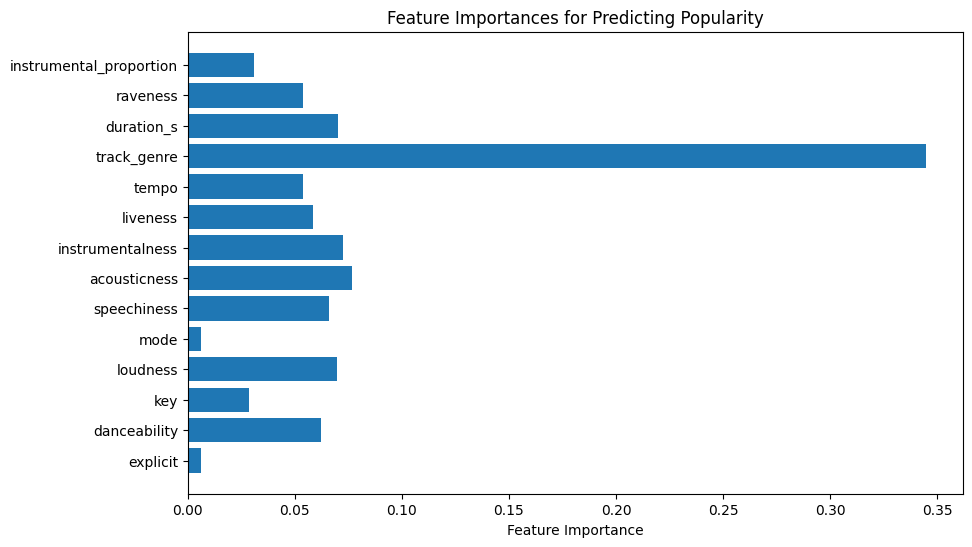

In [ ]:
X = data.drop(columns=['popularity'])
y = data['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

feature_importances = model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importances for Predicting Popularity')
plt.show()

Получаем результат, в котором модель очень сильно опирается на track_genre, а также видит корреляцию с loudness, acousticness, instrumentalness, duration_s, liveness, dancebility и raveness. Корреляция с explicit и mode стремится к нулю, поэтому эти параметры можно ради эксперимента удалить из датасета без потери точности.

# Построение моделей

Создаем модели каждого типа, линейная регрессия, рандом форест, XGBoost и нейронка на основе TF/Keras. Исходя из полученных метрик выбираем лучшую модель и для неё производим кросс-валидацию на пяти фолдах.

In [ ]:
data = data.drop('explicit', axis=1)
data = data.drop('mode', axis=1)

In [ ]:
from sklearn.model_selection import KFold

X = data_temp.drop(columns=['popularity'])
y = data_temp['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Линейная регрессия
lr = LinearRegression()
lr_score = -cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

# 2. Случайный лес
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf_score = -cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

# 3. XGBoost
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb_score = -cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

# 4. Нейронная сеть на TensorFlow/Keras
def create_nn_model(input_dim):
    m = Sequential()
    m.add(Dense(128, input_dim=input_dim, activation='relu'))
    m.add(Dense(256, activation='relu'))
    m.add(Dense(1))
    m.compile(optimizer='adam', loss='mean_squared_error')
    return m

model = create_nn_model(X_train.shape[1])


def evaluate_model(model, X_train, y_train):
    kfold = 5
    mse_scores = []
    for fold in range(kfold):
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
        predictions = model.predict(X_train)
        mse = mean_squared_error(y_train, predictions)
        mse_scores.append(mse)
    return np.mean(mse_scores)

nn_score = evaluate_model(model, X_train, y_train)

print(f"Linear Regression MSE: {lr_score:.2f}")
print(f"Random Forest MSE: {rf_score:.2f}")
print(f"XGBoost MSE: {xgb_score:.2f}")
print(f"Neural Network (TensorFlow/Keras) MSE: {nn_score:.2f}")

best_model_name = min(
    [('Linear Regression', lr_score),
     ('Random Forest', rf_score),
     ('XGBoost', xgb_score),
     ('Neural Network', nn_score)],
    key=lambda x: x[1])[0]

print(f"\nBest model: {best_model_name}")

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []

print(f"\nКросс-валидация для лучшей модели ({best_model_name}):")
for fold_idx, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    if best_model_name == 'Linear Regression':
        model = LinearRegression()
    elif best_model_name == 'Random Forest':
        model = RandomForestRegressor(n_estimators=100, random_state=42)
    elif best_model_name == 'XGBoost':
        model = XGBRegressor(n_estimators=100, random_state=42)
    elif best_model_name == 'Neural Network':
        model = create_nn_model(X_train.shape[1])

    if best_model_name == 'Neural Network':
        model.fit(X_train.iloc[train_index], y_train.iloc[train_index],
                 epochs=10, batch_size=32, verbose=0)
    else:
        model.fit(X_train.iloc[train_index], y_train.iloc[train_index])

    y_pred = model.predict(X_train.iloc[val_index])
    mse = mean_squared_error(y_train.iloc[val_index], y_pred)
    mse_scores.append(mse)

    print(f'Фолд {fold_idx + 1}: MSE = {mse:.2f}')

print('\nИтоговые метрики:')
print(f'Среднее MSE: {np.mean(mse_scores):.2f} ± {np.std(mse_scores):.2f}')

if best_model_name == 'Neural Network':
    final_model = create_nn_model(X_train.shape[1])
    final_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
else:
    final_model = model.fit(X_train, y_train)

test_mse = mean_squared_error(y_test, final_model.predict(X_test))
print(f'\nMSE на тестовом наборе: {test_mse:.2f}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2012/2012 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Linear Regression MSE: 354.72
Random Forest MSE: 223.82
XGBoost MSE: 224.72
Neural Network (TensorFlow/Keras) MSE: 312.81

Best model: Random Forest

Кросс-валидация для лучшей модели (Random Forest):
Фолд 1: MSE = 223.87
Фолд 2: MSE = 224.69
Фолд 3: MSE = 226.47
Фолд 4: MSE = 224.15
Фолд 5: MSE = 222.05

Итоговые метрики:
Среднее MSE: 224.25 ± 1.42

MSE на тестовом наборе: 219.45


#### Результаты

Сравнение моделей выявило явное превосходство ансамблевых методов (Random Forest и XGBoost) над линейной регрессией и нейронной сетью. Наименьшее MSE у Random Forest (MSE=223.82) объясняется способностью деревьев эффективно улавливать нелинейные зависимости в данных, в отличие от линейной модели (MSE=354.72), которая слишком упрощает задачу. Нейросеть (MSE=312.81) показала слабый результат, вероятно, из-за недостаточной глубины архитектуры или отсутствия тщательной настройки гиперпараметров. Кросс-валидация Random Forest подтвердила стабильность модели: низкий разброс MSE между фолдами (222.05 - 226.47) и близость среднего MSE (224.25) к результату на тесте (219.45) указывают на отсутствие переобучения и хорошую обобщающую способность.

----

### Итоги


<b>Вывод:</b>    Проделаны комплексный обзор даты, Feature Engineering и Feature Importances. Был проведен эксперимент с целью найти наиболее эффективную модель. Модель, показавшая наилучший результат, была подвергнута тестированию на пяти фолдах. Random Forest демонстрирует наилучшее качество предсказаний благодаря способности работать с нелинейными зависимостями и шумом в данных, что подтверждается минимальным MSE, устойчивостью на кросс-валидации и хорошим обобщением на тестовой выборке. Для данной задачи он является оптимальным выбором, в то время как нейронная сеть требует дополнительной оптимизации, а линейная модель слишком примитивна для сложных закономерностей в данных.